<a href="https://colab.research.google.com/github/nilperez/British-Airways-customer-reviews/blob/main/Task2/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory data analysis
### Análisis Exploratorio de Datos
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

En primer lugar, exploramos los datos para entender mejor qué tenemos y las propiedades estadísticas del conjunto de datos.

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("/content/drive/MyDrive/BA/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

## Data Dictionary
### Diccionario de datos
- `num_passengers` = number of passengers travelling / número de pasajeros que viajan
- `sales_channel` = sales channel booking was made on / canal de ventas en el que se realizó la reserva
- `trip_type` = trip Type / tipo de viaje (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date / número de días entre la fecha de viaje y la fecha de reserva
- `length_of_stay` = number of days spent at destination / número de días pasados en el destino
- `flight_hour` = hour of flight departure / hora de salida del vuelo
- `flight_day` = day of week of flight departure / día de la semana de la salida del vuelo
- `route` = origin -> destination flight route / ruta de vuelo de origen -> destino
- `booking_origin` = country from where booking was made / país desde donde se realizó la reserva
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking / si el cliente quería equipaje adicional en la reserva
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking / si el cliente quería un asiento preferencial en la reserva
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking / si el cliente quería comidas en el vuelo en la reserva
- `flight_duration` = total duration of flight (in hours) / duración total del vuelo (en horas)
- `booking_complete` = flag indicating if the customer completed the booking / indicador de si el cliente completó la reserva



In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
# Cambiamos los días de string a int
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
#Resumen estadístico del dataset

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


##Data Cleaning
###Limpieza de datos

In [16]:
# Check for missing values / Identificamos valores faltantes
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [19]:
# Checking for duplicates / Identificamos datos duplicados
df.duplicated().sum()

0

In [18]:
# Dropping duplicates / Eliminamos duplicados
df.drop_duplicates(inplace=True)

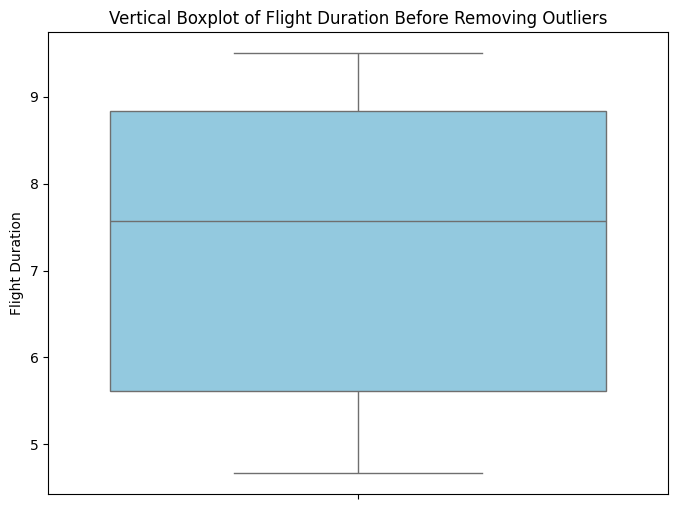

In [23]:
# Plot the vertical boxplot of flight duration
# Graficar el boxplot vertical de la duración del vuelo
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['flight_duration'], color='skyblue')
plt.ylabel('Flight Duration')  # Etiqueta del eje y
plt.title('Vertical Boxplot of Flight Duration Before Removing Outliers')  # Título de la gráfica
plt.show()



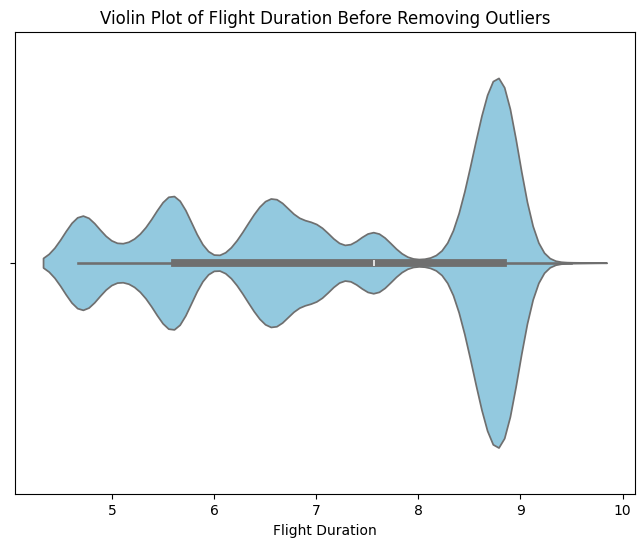

In [22]:
# Plot the violin plot of flight duration
# Graficar el gráfico de violín de la duración del vuelo
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['flight_duration'], color='skyblue')
plt.xlabel('Flight Duration')  # Etiqueta del eje x
plt.title('Violin Plot of Flight Duration Before Removing Outliers')  # Título de la gráfica
plt.show()
